<a href="https://colab.research.google.com/github/Pratim38pal/Machine-Learning-Projects/blob/main/Titanic_Survival_Prediction_using_Machin__Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [36]:
titanic_data =pd.read_csv('/content/Titanic_dataset.csv')
titanic_data.head(12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic_data.shape

(891, 12)

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_data.isnull().sum().sum()

866

# Handling the missing values

In [6]:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [7]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [8]:
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [9]:
print (titanic_data['Embarked'].mode()[0])

S


In [10]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [11]:
titanic_data.isnull().sum().sum()

0

In [12]:
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


# Data Visualization

In [13]:
sns.set()

<ipython-input-15-20589e905df6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic_data,palette='hls')


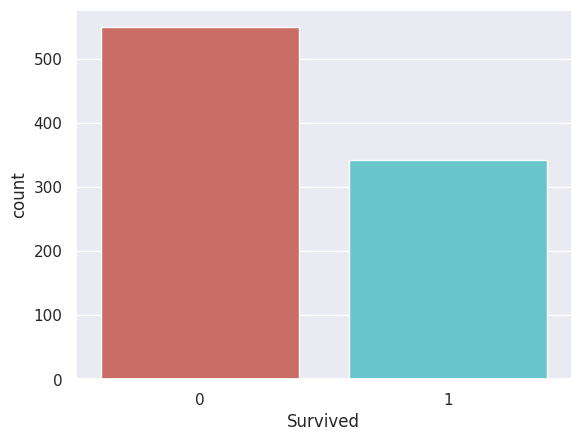

In [15]:
# making a count plot for "Survived" column
sns.countplot(x='Survived', data=titanic_data,palette='hls')
plt.show()

In [16]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


<ipython-input-17-f13ef969eefc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex",data=titanic_data,palette='hls')


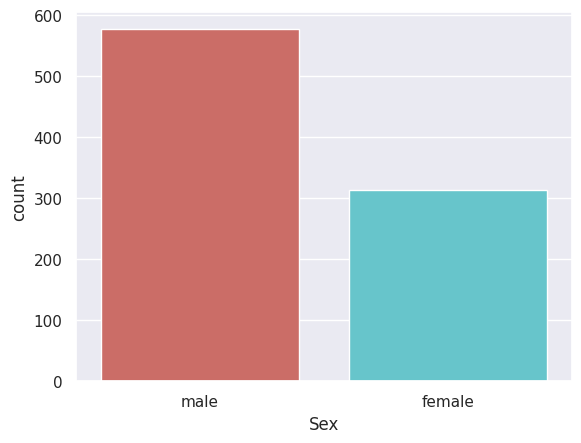

In [17]:
# making a count plot for 'Sex' column
sns.countplot(x="Sex",data=titanic_data,palette='hls')
plt.show()

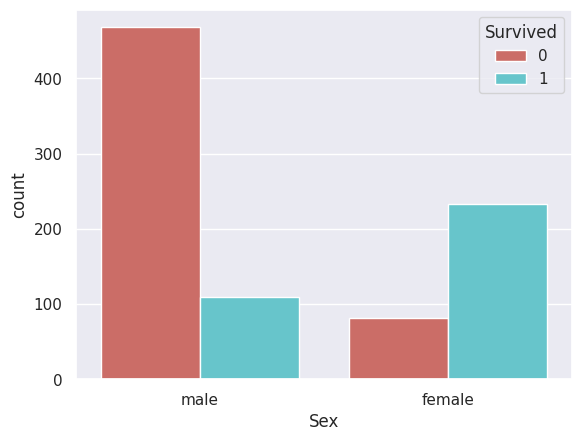

In [18]:
# number of Survivors Gender wise
sns.countplot(x="Sex",hue="Survived",data=titanic_data,palette='hls')
plt.show()


<ipython-input-19-dc612fb345a3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass",data=titanic_data,palette='hls')


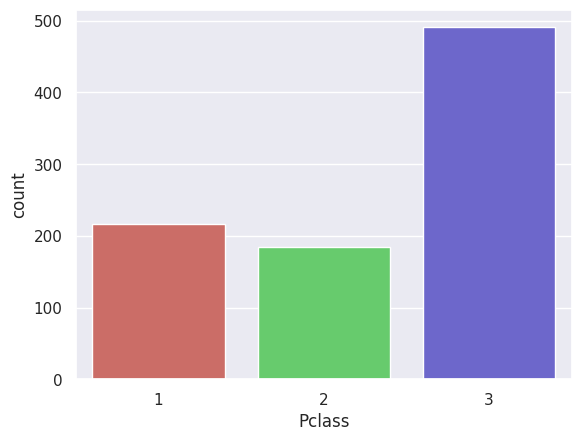

In [19]:
# making a count plot for "Pclass" column
sns.countplot(x="Pclass",data=titanic_data,palette='hls')
plt.show()

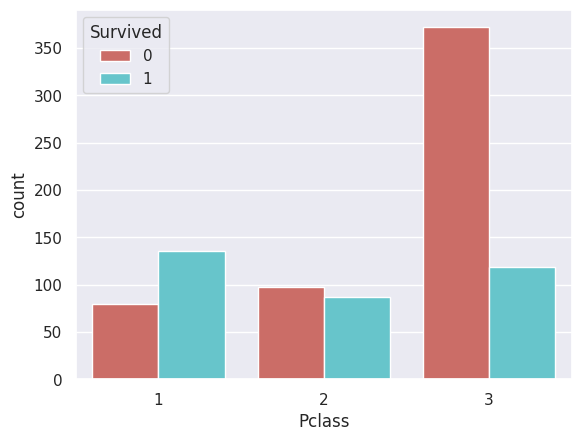

In [20]:
# number of Survivors Pclass wise
sns.countplot(x="Pclass",hue="Survived",data=titanic_data,palette="hls")
plt.show()

# Encoding the Categorical Columns

In [21]:
titanic_data["Embarked"].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [22]:
# converting categorical columns
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [23]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [24]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [25]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [26]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# Splitting the data into training data & Testing data

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [28]:
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(891, 7) (712, 7) (179, 7)
(891,) (712,) (179,)


# Model Training using Logistic Regression

In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
model.score(X_train,Y_train)*100

80.75842696629213

In [32]:
model.score(X_test,Y_test)*100

78.2122905027933

# Model Evalution using accuracy_score

In [33]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of training data : ',training_data_accuracy)

Accuracy score of training data :  0.8075842696629213


In [34]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print('Accuracy score of testing data : ',testing_data_accuracy)

Accuracy score of testing data :  0.7821229050279329


# Predictive Model

In [37]:
input_data = (3,0,35.00,0,0,8.05,0)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('The person did not survive')
else:
  print('The person survived')

[0]
The person did not survive


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
